# Importing tools

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

# loading and seeing the description

In [2]:
cancer=load_breast_cancer()

# Cross Validation Evaluation

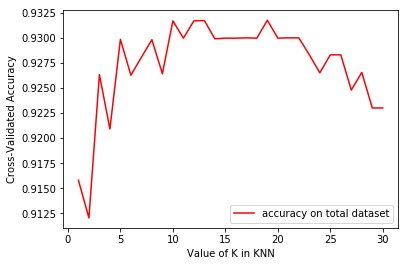

In [3]:
X=cancer.data
y=cancer.target

from sklearn.model_selection import cross_val_score
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean()
    k_scores.append(scores)
    
%matplotlib inline
plt.plot(k_range,k_scores,label='accuracy on total dataset',c='r')
plt.xlabel('Value of K in KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.legend()

In [4]:
print(k_scores.index(max(k_scores)))
print('Accuracy of KNN for n=19 on the testing dataset is :{:.3f}'.format(max(k_scores)))

18
Accuracy of KNN for n=19 on the testing dataset is :0.932


# Using Grid Search CV

In [5]:
from sklearn.model_selection import GridSearchCV
param_grid = dict(n_neighbors=k_range)

In [6]:
grid= GridSearchCV(knn, param_grid, cv=10, scoring='accuracy',return_train_score=False)
grid.fit(X,y)
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']].head()

,mean_test_score,std_test_score,params
0,0.915641,0.029637,{'n_neighbors': 1}
1,0.912127,0.017995,{'n_neighbors': 2}
2,0.926186,0.029721,{'n_neighbors': 3}
3,0.920914,0.029631,{'n_neighbors': 4}
4,0.929701,0.028984,{'n_neighbors': 5}


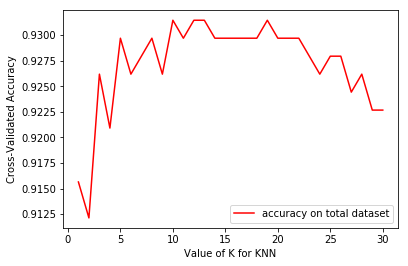

In [7]:
grid_mean_scores = grid.cv_results_['mean_test_score']

plt.plot(k_range, grid_mean_scores,label='accuracy on total dataset',c='r')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.legend()

# Best Values

In [8]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.9314586994727593
{'n_neighbors': 10}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')


In [9]:
knn=KNeighborsClassifier(n_neighbors=10)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean()
print('Accuracy of KNN for n=10 on the entire dataset is :{:.3f}'.format(scores))

Accuracy of KNN for n=10 on the entire dataset is :0.932
